In [2]:
#Objective:2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.optimize import minimize
df=pd.read_csv(r"C:\Users\aamir\OneDrive\Desktop\CSV Files\housing.csv")

def distance_to_line(point, slope, intercept):
    x, y = point
    return abs(slope * x - y + intercept) / np.sqrt(slope**2 + 1)

def max_distance_to_line(houses, slope, intercept):
    distances = [distance_to_line(point, slope, intercept) for point in houses]
    return np.max(distances)

def objective(parameters, X):
    slope, intercept = parameters
    return max_distance_to_line(X, slope, intercept)

def compute_fair_line_kmeans(X, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Initialize minimized maximum distance
    min_max_distance = float('inf')
    optimal_parameters = None

    # For each cluster, find the line parameters that minimize the maximum distance
    for i in range(k):
        cluster_houses = X[labels == i]
        result = minimize(objective, [0, 0], args=(cluster_houses,), method='BFGS')
        slope, intercept = result.x
        max_distance = max_distance_to_line(cluster_houses, slope, intercept)
        if max_distance < min_max_distance:
            min_max_distance = max_distance
            optimal_parameters = result.x

    return optimal_parameters, min_max_distance

# Example usage
X = df[['latitude', 'longitude']].values
k = 2  # Number of clusters
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(X, k)
print("Optimal slope and intercept:", optimal_parameters)
print("Minimized maximum distance to any house:", minimized_max_distance)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal slope and intercept: [-3.36755043  0.06088739]
Minimized maximum distance to any house: 2.145561378154791


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

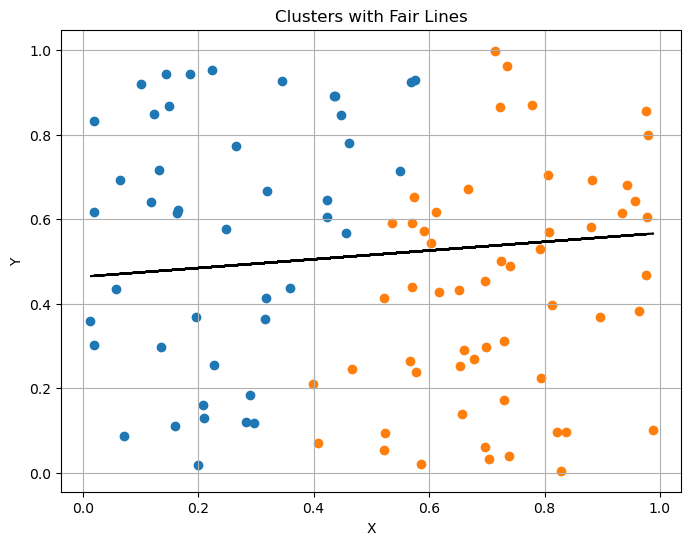

In [3]:
import matplotlib.pyplot as plt

def plot_clusters_with_fair_line(houses, labels, fair_lines):
    plt.figure(figsize=(8, 6))

    # Plot data points colored by cluster
    for i in range(len(np.unique(labels))):
        cluster_houses = houses[labels == i]
        plt.scatter(cluster_houses[:, 0], cluster_houses[:, 1], label=f'Cluster {i+1}')

    # Plot fair lines for each cluster
    for i, line_params in enumerate(fair_lines):
        slope, intercept = line_params
        plt.plot(houses[:, 0], slope * houses[:, 0] + intercept, linestyle='--', color='black',
                 label=f'Fair line for Cluster {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters with Fair Lines')
    plt.grid(True)
    plt.show()

# Generate synthetic data
np.random.seed(0)
data = np.random.rand(100, 2)

# Compute KMeans and fair lines
k = 2
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(data, k)

# Plot clusters with fair lines
plot_clusters_with_fair_line(data, KMeans(n_clusters=k, random_state=42).fit(data).labels_, [optimal_parameters])

In [4]:
#Obj:2 Silhouette Score
from sklearn.metrics import silhouette_score

# Example usage
X = df[['latitude', 'longitude']].values
k = 2  # Number of clusters
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(X, k)

# Perform K-means clustering with the obtained optimal parameters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_score_value = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score_value)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7562423686755555
